WaveData20190313_006.csv


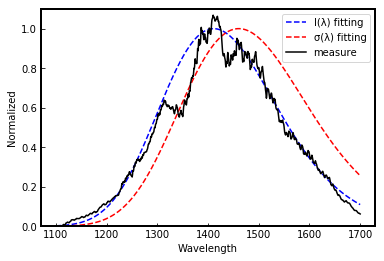

FWHM: 1327.4
FWHM: 1623.1999999999998
FWHM: 1623.8


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# set DataFrame for spectrumu
path = r'D:\desktop\樣本資料\ASE_lineshape\190313'
os.chdir(path)
file = os.listdir()
print(file[2])
OSA = pd.read_csv(file[2])[26:].drop('Unnamed: 2', axis = 1)
OSA = pd.DataFrame(OSA, dtype = np.float)
OSA.columns = ['Wavelength', 'Intensity']
# lineshape data
value = OSA['Intensity']
value = value / 1.5e-05 
value = value.ewm(20).mean() - 0.03
# fitting data
x = np.linspace(1100, 1700, 1001)
lambda_c = 1440
K_e = 0.118
intensity = (x**(-3))*np.exp(-((x-lambda_c)/(K_e*x))**2)
sigma_e = (x**2)*np.exp(-((x-lambda_c)/(K_e*x))**2)
#plot figure 
plt.plot(x, intensity/np.max(intensity), 'blue', linestyle = '--')
plt.plot(x, sigma_e/np.max(sigma_e), 'red', linestyle = '--')
plt.plot(OSA['Wavelength'], value, 'black')
plt.ylim((0,1.1))
ax = plt.gca()
sp = ['right', 'left', 'top', 'bottom']
for i in sp:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(2)
ax.tick_params(axis = "y", direction = "in")
ax.tick_params(axis = "x", direction = "in")
plt.xlabel('Wavelength')
plt.ylabel('Normalized')
plt.legend(loc = 'best', labels = ['I(λ) fitting', 'σ(λ) fitting', 'measure'])
plt.show()

# 3dB band width
window = 0.0026
for i, v in enumerate(sigma_e/ np.max(sigma_e)):
    if abs(v - 0.5) <= window:
        print('FWHM:', x[i]) 

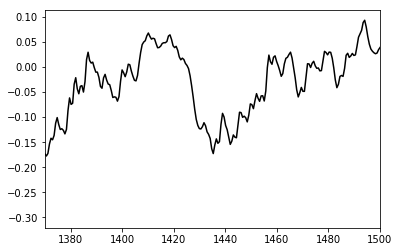

In [18]:

ab = (value)-(intensity/np.max(intensity))
plt.xlim(1370,1500)
plt.plot(OSA['Wavelength'], ab, 'black')